In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tic_env import *

### Question 1

In [2]:
Turns = np.array(['X','O'])
player1 = QPlayer(epsilon=0.1, player=Turns[0])
player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
env1 = QlearningEnv(player1=player1, player2=player2)
env1.train(20000)

Text(0, 0.5, 'avg reward')

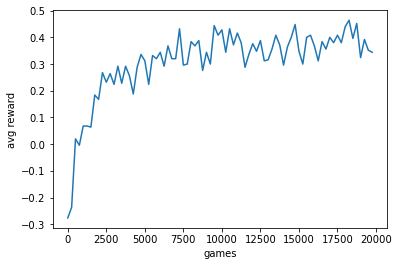

In [3]:
length1=250
lst1 = env1.get_reward(player=1)
x_ticks = range(0, len(lst1), length1)
avg_reward1 = []
for i in range(len(lst1)//length1):
    avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)
plt.plot(x_ticks, avg_reward1)
plt.xlabel(f'games')
plt.ylabel('avg reward')

### Question 2

In [4]:
Turns = np.array(['X','O'])
training_reward_lists = []
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
for epoch_star in epoch_stars:
    player1 = QPlayer(epsilon=0.2, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env2 = QlearningEnv(player1=player1, player2=player2)
    env2.set_decay_eps(epoch_star=epoch_star)
    env2.train(20000)
    training_reward_lists.append(env2.get_reward(player=1))

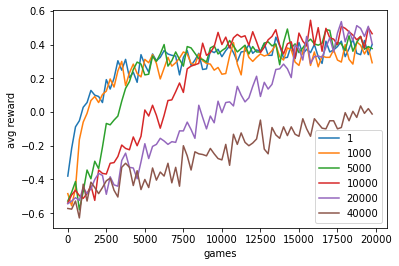

In [5]:
length1=250
x_ticks = range(0, len(training_reward_lists[0]), length1)
for j in range(len(epoch_stars)):
    avg_reward1 = []
    for i in range(len(training_reward_lists[0])//length1):
        avg_reward1.append(sum(training_reward_lists[j][i*length1:(i+1)*length1])/length1)
    plt.plot(x_ticks, avg_reward1, label=str(epoch_stars[j]))
    plt.xlabel(f'games')
    plt.ylabel('avg reward')
plt.legend()

### Question 3

In [6]:
Turns = np.array(['X','O'])
test_reward_lists_random = []
test_reward_lists_optimal = []
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
for epoch_star in epoch_stars:
    player1 = QPlayer(epsilon=0.2, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env3 = QlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=epoch_star)
    env3.set_testing()
    env3.train(20000)
    test_reward_lists_random.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal.append(env3.test_avg_reward['optimal'])

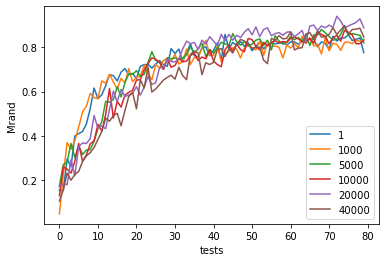

In [7]:
# M_rand
for j in range(len(epoch_stars)):
    plt.plot(test_reward_lists_random[j], label=str(epoch_stars[j]))
plt.xlabel(f'tests')
plt.ylabel('Mrand')
plt.legend()

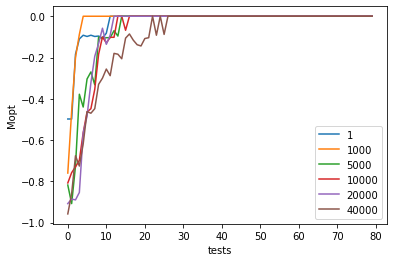

In [8]:
# M_opt
for j in range(len(epoch_stars)):
    plt.plot(test_reward_lists_optimal[j], label=str(epoch_stars[j]))
plt.xlabel(f'tests')
plt.ylabel('Mopt')
plt.legend()

### Question 4

In [10]:
Turns = np.array(['X','O'])
best_epoch_star = 20000
test_reward_lists_random = []
test_reward_lists_optimal = []
test_epses = [0.0, 0.1, 0.2, 0.4, 0.8]
for test_eps in test_epses:
    player1 = QPlayer(epsilon=0.2, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env3 = QlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=best_epoch_star)
    env3.set_testing(test_eps=test_eps)
    env3.train(20000)
    test_reward_lists_random.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal.append(env3.test_avg_reward['optimal'])

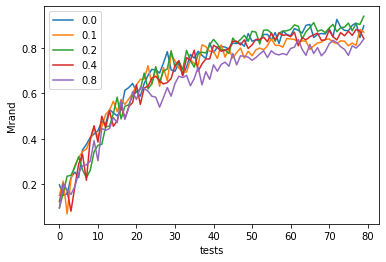

In [11]:
# M_rand
for j in range(len(test_epses)):
    plt.plot(test_reward_lists_random[j], label=str(test_epses[j]))
    plt.xlabel(f'tests')
    plt.ylabel('Mrand')
plt.legend()

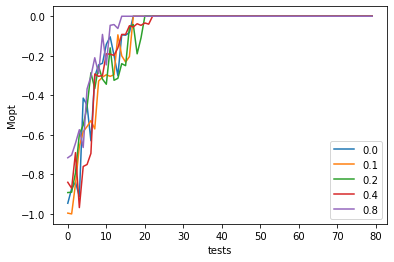

In [12]:
# M_opt
for j in range(len(test_epses)):
    plt.plot(test_reward_lists_optimal[j], label=str(test_epses[j]))
    plt.xlabel(f'tests')
    plt.ylabel('Mopt')
plt.legend()

### Question 5

In [13]:
print(max([max(it) for it in test_reward_lists_random]))

0.94
